In [4]:
from amex_default_prediction.utils import spark_session
from pyspark.ml.tuning import CrossValidatorModel
from pathlib import Path

intermediate_root = Path("../data/intermediate")
model_path = intermediate_root / "models/gbt/20220711011636-0.5.0-fbf6477"
spark = spark_session()
model = CrossValidatorModel.read().load(model_path.as_posix())
model

CrossValidatorModel_c2dd48301b37

In [6]:
model.avgMetrics

[0.753186915872277, 0.7631235971752401, 0.7668335629482486]

In [14]:
[x for x in dir(model.bestModel) if "__" not in x]

['_abc_impl',
 '_copyValues',
 '_copy_params',
 '_defaultParamMap',
 '_dummy',
 '_from_java',
 '_is_protocol',
 '_paramMap',
 '_params',
 '_randomUID',
 '_resetUid',
 '_resolveParam',
 '_set',
 '_setDefault',
 '_shouldOwn',
 '_testOwnParam',
 '_to_java',
 '_transform',
 'clear',
 'copy',
 'explainParam',
 'explainParams',
 'extractParamMap',
 'getOrDefault',
 'getParam',
 'hasDefault',
 'hasParam',
 'isDefined',
 'isSet',
 'load',
 'params',
 'read',
 'save',
 'set',
 'stages',
 'transform',
 'uid',
 'write']

In [17]:
model.bestModel.stages

[GBTClassificationModel: uid = GBTClassifier_f3deaa4e576d, numTrees=100, numClasses=2, numFeatures=220,
 PredictionTransformer]

In [20]:
best_model = model.bestModel.stages[0]
features = best_model.featureImportances

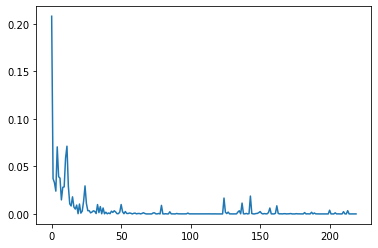

In [25]:
from matplotlib import pyplot as plt

plt.plot(features.toArray())

In [30]:
(features.toArray() > 0.001).sum()

67

In [32]:
(features.toArray() > 0.0001).sum()

114

In [45]:
import numpy as np

# find the location where we retain x% of importance
tol = 0.99
z = np.array(sorted(features.toArray(), reverse=True))
for i, v in enumerate(z.cumsum()):
    if v >= tol:
        print(i)
        break
print(f"{i} out of {len(z)} features explains {tol*100}% of variance")

83
83 out of 220 features explains 99.0% of variance
